In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\egimenez\Downloads\Datasets\netflix_titles.csv")

# Exploration

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
# We delete categories that aren't useful for our analysis.

df = df.drop(labels=["show_id", "date_added", "description"], axis=1)

In [7]:
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [8]:
df.isnull().sum()/len(df) * 100

type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
dtype: float64

In [9]:
df.groupby('type').count()

,title,director,cast,country,release_year,rating,duration,listed_in
type,,,,,,,,
Movie,6131,5943,5656,5691,6131,6129,6128,6131
TV Show,2676,230,2326,2285,2676,2674,2676,2676


# Movies vs Tv Shows on Netflix

In [10]:
sns.set_style("darkgrid")


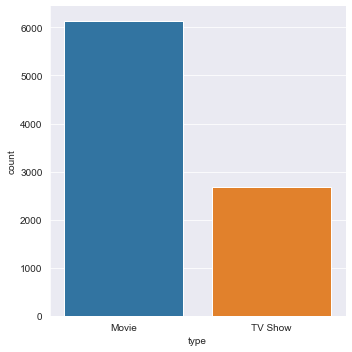

In [11]:
sns.catplot(x = "type", data = df, kind = "count");



# Directors with more content on Netflix

In [12]:
directors = df.groupby('director', as_index=False).count()
directors = directors.sort_values('listed_in', ascending= False).head(10)
directors

,director,type,title,cast,country,release_year,rating,duration,listed_in
3392,Rajiv Chilaka,19,19,17,3,19,19,19,19
3443,"Raúl Campos, Jan Suter",18,18,18,18,18,18,18,18
4046,Suhas Kadav,16,16,13,1,16,16,16,16
2598,Marcus Raboy,16,16,16,15,16,16,16,16
1790,Jay Karas,14,14,14,14,14,14,14,14
685,Cathy Garcia-Molina,13,13,13,13,13,13,13,13
1787,Jay Chapman,12,12,12,12,12,12,12,12
4480,Youssef Chahine,12,12,12,12,12,12,12,12
2671,Martin Scorsese,12,12,12,12,12,12,12,12
4020,Steven Spielberg,11,11,11,11,11,11,11,11


Text(0.5, 0, 'All the content they have on Netflix')

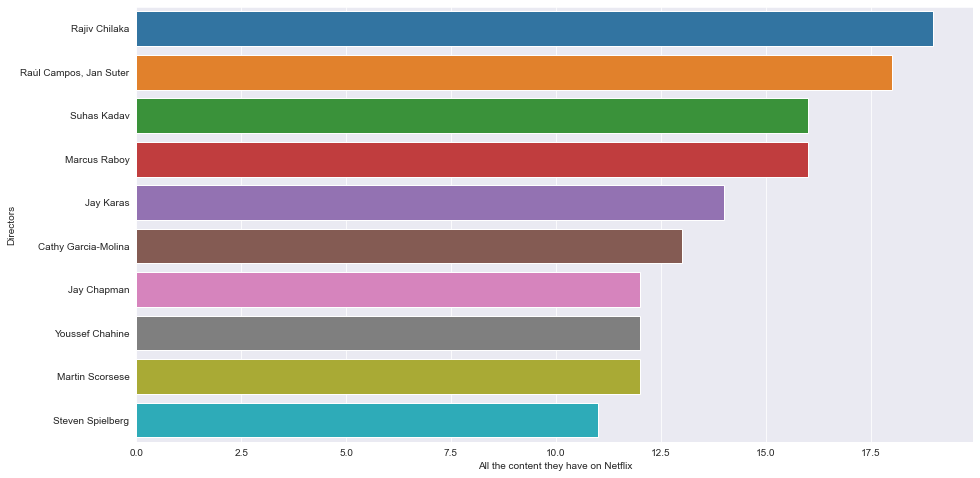

In [13]:
plt.figure(figsize=(15,8))

sns.barplot(x = directors.listed_in, y = directors.director)

plt.ylabel("Directors")
plt.xlabel("All the content they have on Netflix")

# Where does the content come from?

In [14]:
country = df.groupby('country', as_index=False).count()
country = country.sort_values('listed_in', ascending= False).head(10)
country

,country,type,title,director,cast,release_year,rating,duration,listed_in
603,United States,2818,2818,2048,2488,2818,2818,2815,2818
251,India,972,972,890,940,972,972,972,972
506,United Kingdom,419,419,212,351,419,419,419,419
319,Japan,245,245,85,240,245,244,245,245
435,South Korea,199,199,49,196,199,199,199,199
58,Canada,181,181,119,162,181,181,181,181
444,Spain,145,145,106,127,145,145,145,145
162,France,124,124,81,106,124,124,124,124
342,Mexico,110,110,71,102,110,110,110,110
150,Egypt,106,106,90,105,106,106,106,106


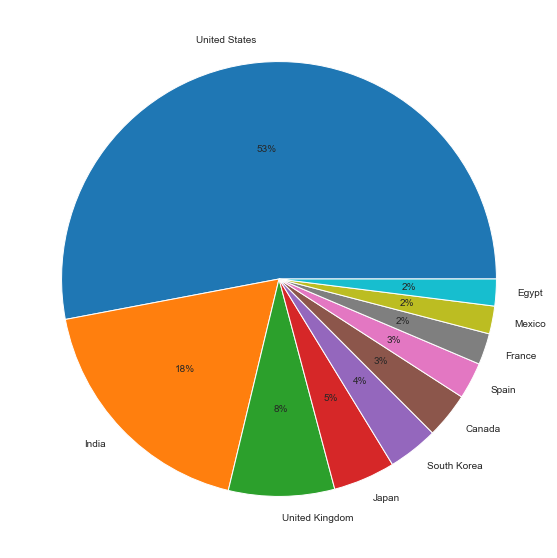

In [15]:
fig, ax = plt.subplots(figsize = (15, 10))

plt.pie(country.listed_in, labels=country.country, autopct='%.0f%%')

plt.show()

# Films and tv shows by decade

In [16]:
out = df.groupby(df["release_year"] // 10).count()
out.index.name = "decade"
out = out.reset_index().assign(decade=out.index * 10)
print(out)

   decade  type  title  director  cast  country  release_year  rating  \
0    1920     1      1         0     0        0             1       1   
1    1940    15     15        14     5       15            15      15   
2    1950    11     11        11    11       11            11      11   
3    1960    25     25        23    25       24            25      25   
4    1970    70     70        64    68       70            70      70   
5    1980   129    129       121   128      121           129     129   
6    1990   274    274       240   270      261           274     274   
7    2000   810    810       679   796      786           810     810   
8    2010  5927   5927      4176  5358     5453          5927    5923   
9    2020  1545   1545       845  1321     1235          1545    1545   

   duration  listed_in  
0         1          1  
1        15         15  
2        11         11  
3        25         25  
4        70         70  
5       129        129  
6       274        27

Text(0.5, 0, 'Release decade')

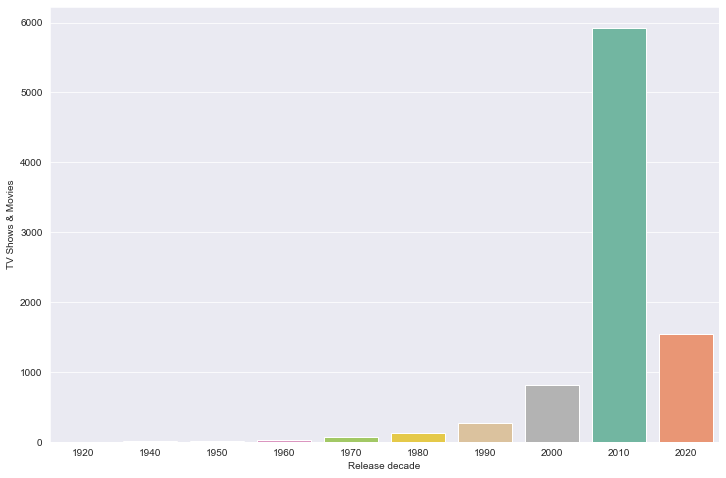

In [17]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.barplot(x = out.decade, y = out.listed_in, palette = "Set2")

plt.ylabel("TV Shows & Movies")
plt.xlabel("Release decade")


# Content rating - Movies vs TV Shows

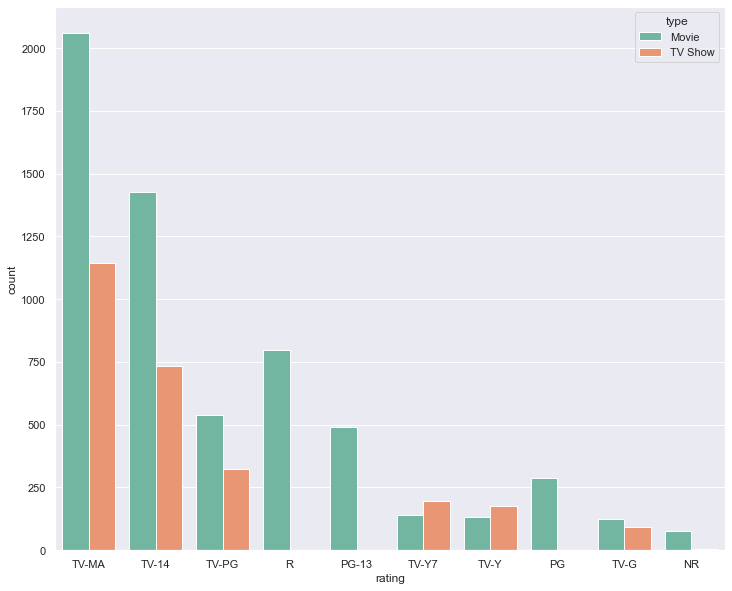

In [18]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", hue = 'type', data=df, palette="Set2", order=df['rating'].value_counts().index[0:10])

# Release year of movies and TV Shows 

Text(0.5, 8.95999999999998, 'Type of content')

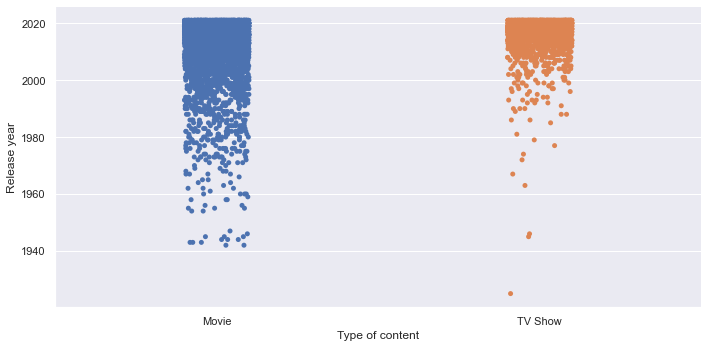

In [19]:
sns.catplot(x = "type", y = "release_year", data = df, aspect = 2);

plt.ylabel("Release year")
plt.xlabel("Type of content")

# What are the most used words in all Netflix's titles?

In [20]:
from wordcloud import WordCloud


In [21]:
text = " ".join(title for title in df.title)

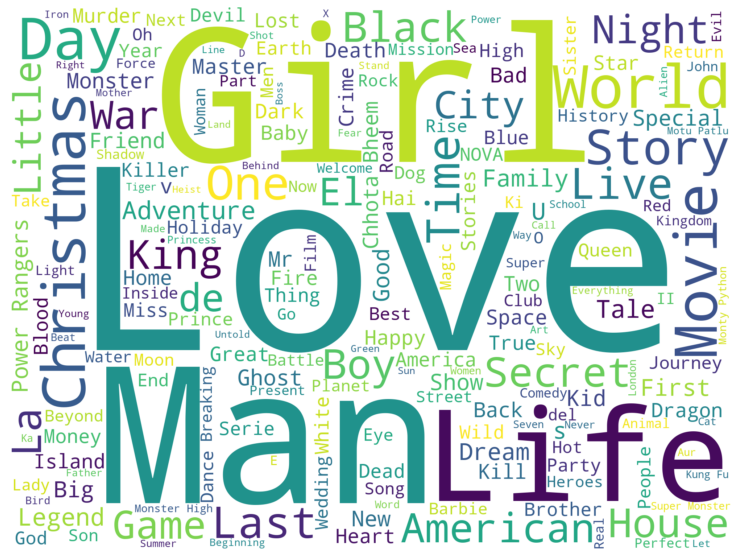

In [22]:
wordcloud = WordCloud(width=2000, height=1500, background_color="white").generate(text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# People with more appearances in Netflix content

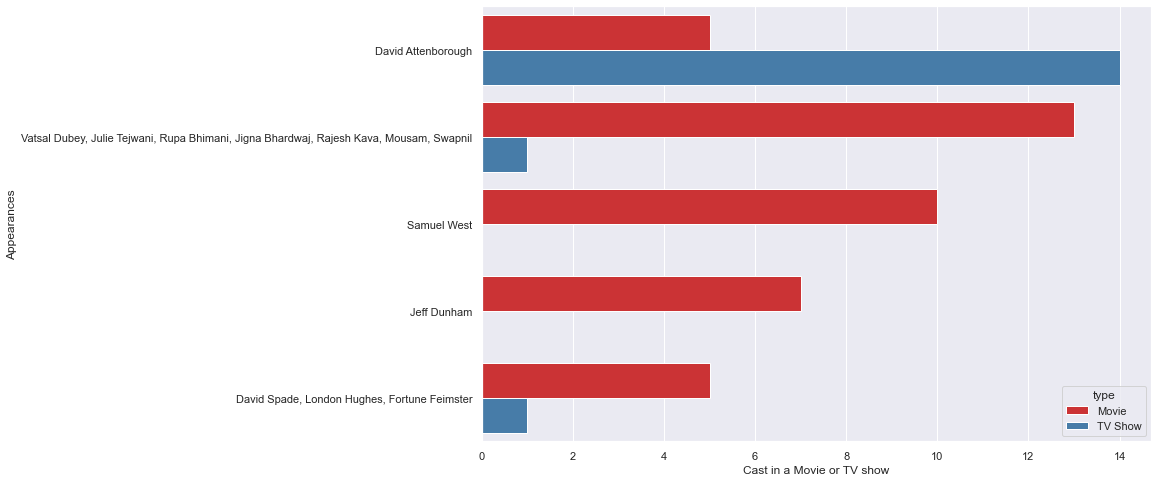

In [63]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.countplot(y="cast", hue = 'type', data=df, palette="Set1", order=df['cast'].value_counts().index[0:5])
plt.ylabel("Appearances")
plt.xlabel("Cast in a Movie or TV show")
plt.show()


# Type of genres

In [122]:
text_genre = " ".join(genre for genre in df.listed_in)

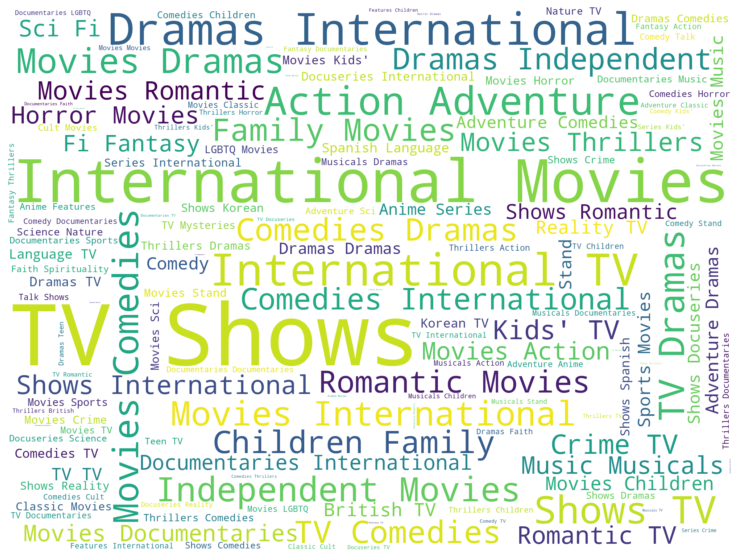

In [123]:
wordcloud = WordCloud(width=2000, height=1500, background_color="white").generate(text_genre)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()